Missing Values:
 age          0
job          0
marital      1
education    0
default      0
balance      1
housing      0
loan         0
contact      1
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     1
y            1
dtype: int64


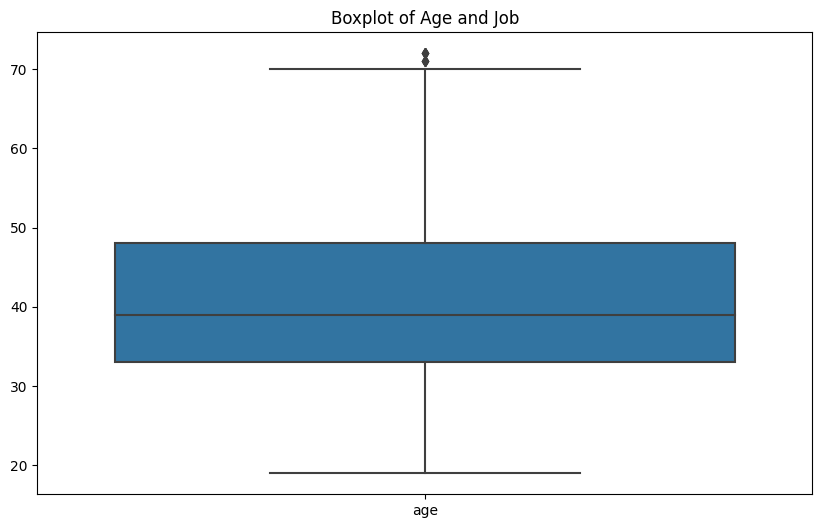

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def Processing_credit(file_path):
    try:
        #Loading the dataset
        credit_data = pd.read_csv(file_path)
    except FileNotFoundError:
        print("Error: file '{file_path}' not found. ")
        return
    
    # Check for missing values in each column
    missing_values = credit_data.isnull().sum()
    print("Missing Values:\n", missing_values)

    # If there are missing values, handle them appropriately
    # For example, replace missing values with the median for numerical columns
    credit_data.fillna(credit_data['balance'].median(), inplace=True)

    # Detect and handle outliers using z-score or IQR methods
    # For example, remove outliers from numerical columns using z-score
    from scipy.stats import zscore
    z_scores = zscore(credit_data.select_dtypes(include=['int64', 'float64']))
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < 3).all(axis=1)
    credit_data = credit_data[filtered_entries]

    #Address Outliers
    #Visualize the distribution of numeric columns using box plots
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=credit_data[['age', 'job']])
    plt.title("Boxplot of Age and Job")
    plt.show()




if __name__ == "__main__":
    file_path = "bank.csv"
    Processing_credit(file_path)

